[2.350484848022461]
[2.350484848022461, 2.350484848022461]
[2.350484848022461, 2.350484848022461, 2.350484848022461]
[2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461]
[2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461]
[2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461]
[2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461]
[2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461]
[2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461]
[2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.350484848022461, 2.

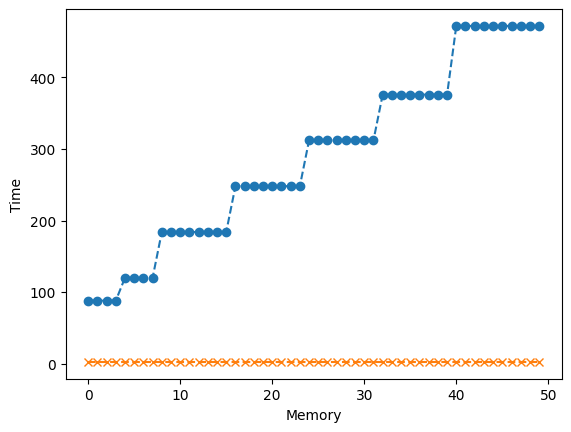

Nível de combustivél atingiu [0.0].


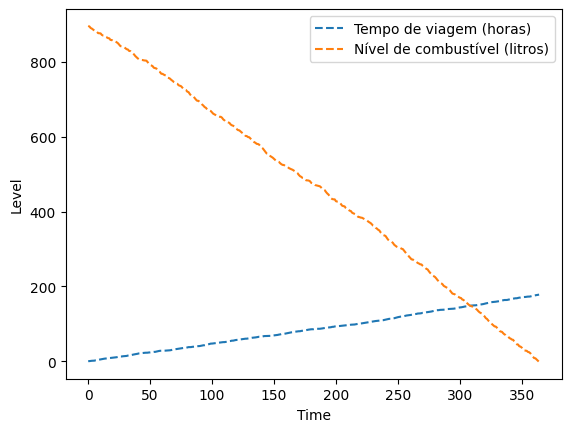

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import sys
import time
import random

# Configuração do banco de dados
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="7010",
    database="combustivel"
)
cursor = db.cursor()

#--------------------------Algas--------------------------
cursor.execute("CREATE TABLE IF NOT EXISTS empresa (empresa varchar(14), cotacao_diesel float)")

lista=[]
sizes = range(1000, 6000, 100)
list_time = []
list_memory = []
#list_fuel = [7.47, 7.32, 7.32, 7.01, 6.99, 6.96, 6.94, 6.73, 6.66, 6.65, 6.72,  6.68, 6.71, 6.71, 6.69, 6.68, 6.67, 6.63, 6.48, 6.42, 6.38, 6.39, 6.32, 6.10, 6.05, 6.02, 6.00, 5,97]
start = time.time()

#average = np.mean(list_fuel)
empresa = input('Digite o nome da empresa: ')

while True:
  for x in sizes:
        cotacao_diesel = random.uniform(5.97, 7.47) #data da cotação 28/03/2023
        lista.append(cotacao_diesel)
        endtime = time.time()
        list_time.append(endtime - start)
        list_memory.append(sys.getsizeof(lista))
        print(list_time)
  break

a = 0
for x in lista:
    cursor.execute(f"INSERT INTO empresa (empresa, cotacao_diesel) VALUES ('{empresa}', {lista[a]})")
    a += 1

db.commit()

# Plota gráfico de nível de combustível x tempo de viagem
print("Algas.")
plt.plot(list_memory, 'o--')
plt.plot(list_time, 'x--')
plt.xlabel("Memory")
plt.ylabel("Time")
plt.show()

#--------------------------Simulação do Sensor de Combustivél--------------------------

# Cria tabela de dados
cursor.execute("CREATE TABLE IF NOT EXISTS dados (tempo int, nivel float)")

# Simula dados de nível de combustível
tempo = 0
nivel = 900
vetor_tempo = []
vetor_nivel = []
while nivel > 0:
    nivel -= np.random.uniform(0, 5) # Gasta de 0 a 5 litros de combustível
    tempo += np.random.uniform(0, 1) # Viaja de 0 a 1 hora
    vetor_tempo.append(tempo)
    vetor_nivel.append(nivel)

    if(nivel > 0):
        cursor.execute("INSERT INTO dados (tempo, nivel) VALUES (%s, %s)", (tempo, nivel))
        db.commit()

    elif(nivel <= 0):        
        # Plota gráfico de nível de combustível x tempo de viagem
        print("Nível de combustivél atingiu [0.0].")
        plt.plot(vetor_tempo, '--', label='Tempo de viagem (horas)')
        plt.plot(vetor_nivel, '--', label='Nível de combustível (litros)')
        plt.xlabel("Time")
        plt.ylabel("Level")
        plt.legend()
        plt.show()
